In [20]:
from tbparse import SummaryReader
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

log_dir = "C:\\Users\\di\\Documents\\BA_vivi\\Coding\\gaussian-splatting\\output\\geese_sleep_r_4_it_7000_eval_test_10"
reader = SummaryReader(log_dir)
df = reader.scalars
df.head()

,step,tag,value
0,1,iter_time,183.589890
1,2,iter_time,99.553284
2,3,iter_time,28.915712
3,4,iter_time,31.489023
4,5,iter_time,31.145985


In [5]:
print("number of different tags: " + str(df['tag'].nunique()))
print("steps with several values: " + str(df['step'].duplicated().sum()))
print("numer of different steps: " + str(df['step'].nunique()))
print("Null values: " + str(df.isna().any().any()))
df.dtypes

number of different tags: 8
steps with several values: 17500
numer of different steps: 7000
Null values: False


step       int64
tag       object
value    float64
dtype: object

In [6]:
df.tag = df.tag.astype('category')
df.dtypes

step        int64
tag      category
value     float64
dtype: object

In [7]:
# new dataframe with unique steps and tags as columns with values
df_train_metrics = df.pivot(index='step', columns='tag', values='value')
df_train_metrics.columns.name = None
df_train_metrics.index.name = "iteration"
df_train_metrics.reset_index(inplace=True)
df_train_metrics.tail()

,iteration,iter_time,test/loss_viewpoint - l1_loss,test/loss_viewpoint - psnr,total_points,train/loss_viewpoint - l1_loss,train/loss_viewpoint - psnr,train_loss_patches/l1_loss,train_loss_patches/total_loss
6995,6996,286.248962,NaN,NaN,NaN,NaN,NaN,0.072412,0.115916
6996,6997,289.067017,NaN,NaN,NaN,NaN,NaN,0.056402,0.088284
6997,6998,297.010162,NaN,NaN,NaN,NaN,NaN,0.062337,0.098416
6998,6999,295.701508,NaN,NaN,NaN,NaN,NaN,0.079397,0.124432
6999,7000,292.348938,0.073025,19.713501,5019412.0,0.064959,20.577747,0.071710,0.109292


In [8]:
# final training metrics (last iteration)
df_eval_metrics = df_train_metrics.dropna()
df_eval_metrics.drop(columns=['train_loss_patches/l1_loss', 'train_loss_patches/total_loss'], inplace=True)
df_eval_metrics.rename(columns={'iteration': 'iterations'}, inplace=True)
df_eval_metrics.insert(0, 'model', os.path.basename(log_dir))
df_eval_metrics.head()


c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,model,iterations,iter_time,test/loss_viewpoint - l1_loss,test/loss_viewpoint - psnr,total_points,train/loss_viewpoint - l1_loss,train/loss_viewpoint - psnr
9,geese_sleep_r_4_it_7000_eval_test_10,10,23.754751,0.197258,12.460523,204905.0,0.200161,12.252460
19,geese_sleep_r_4_it_7000_eval_test_10,20,28.327936,0.169517,13.629827,204905.0,0.175246,13.322865
29,geese_sleep_r_4_it_7000_eval_test_10,30,25.643328,0.155506,14.299769,204905.0,0.161231,14.010320
39,geese_sleep_r_4_it_7000_eval_test_10,40,26.144768,0.147022,14.750596,204905.0,0.151921,14.496703
49,geese_sleep_r_4_it_7000_eval_test_10,50,24.266785,0.140670,15.106079,204905.0,0.144630,14.873575


In [9]:
# drop columns with NaN values
df_train_metrics.dropna(axis=1, how='any', inplace=True)
df_train_metrics.tail()

,iteration,iter_time,train_loss_patches/l1_loss,train_loss_patches/total_loss
6995,6996,286.248962,0.072412,0.115916
6996,6997,289.067017,0.056402,0.088284
6997,6998,297.010162,0.062337,0.098416
6998,6999,295.701508,0.079397,0.124432
6999,7000,292.348938,0.071710,0.109292


In [10]:
#export training metrics as csv

export_folder = log_dir + "/eval"
os.makedirs(log_dir + "/eval", exist_ok=True)

df_train_metrics.to_csv(export_folder + '/training_process.csv', index=False)
df_eval_metrics.to_csv(export_folder + '/eval_metrics.csv', index=False)

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


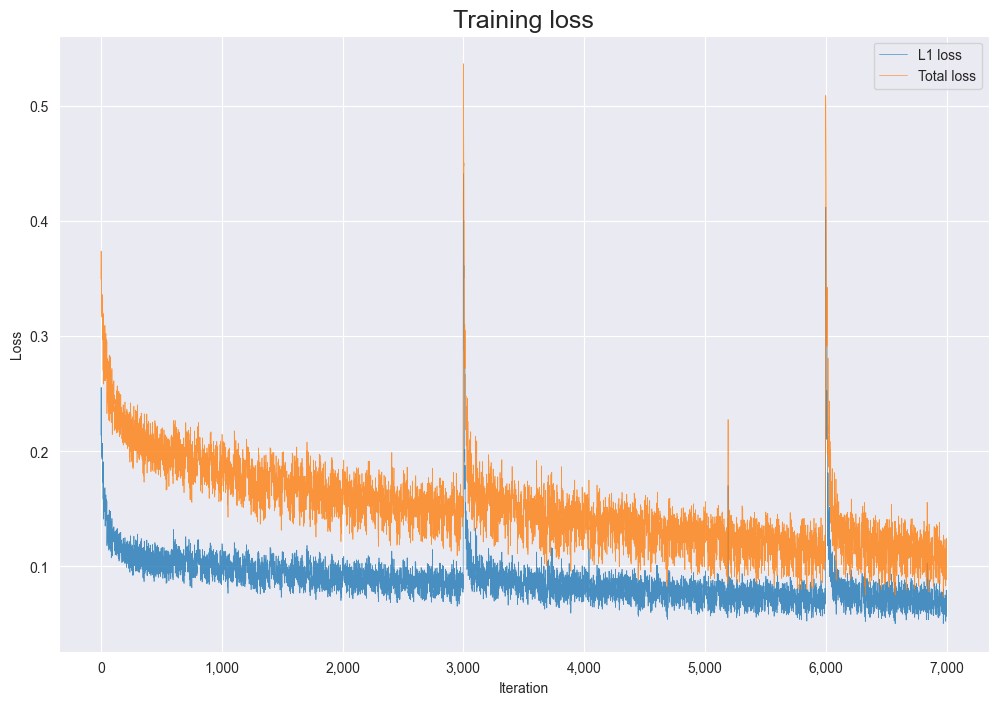

In [11]:
plot_folder = log_dir + '/eval/plots'
os.makedirs(plot_folder, exist_ok=True)

# plot training loss curves
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.title('Training loss', fontsize=18)
plt.plot(df_train_metrics['train_loss_patches/l1_loss'], label='L1 loss', linewidth=0.5, alpha=0.8)
plt.plot(df_train_metrics['train_loss_patches/total_loss'], label='Total loss', linewidth=0.5, alpha=0.8)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])

# export plot as png
plt.savefig(plot_folder + '/training_loss.png')

# plot curves
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


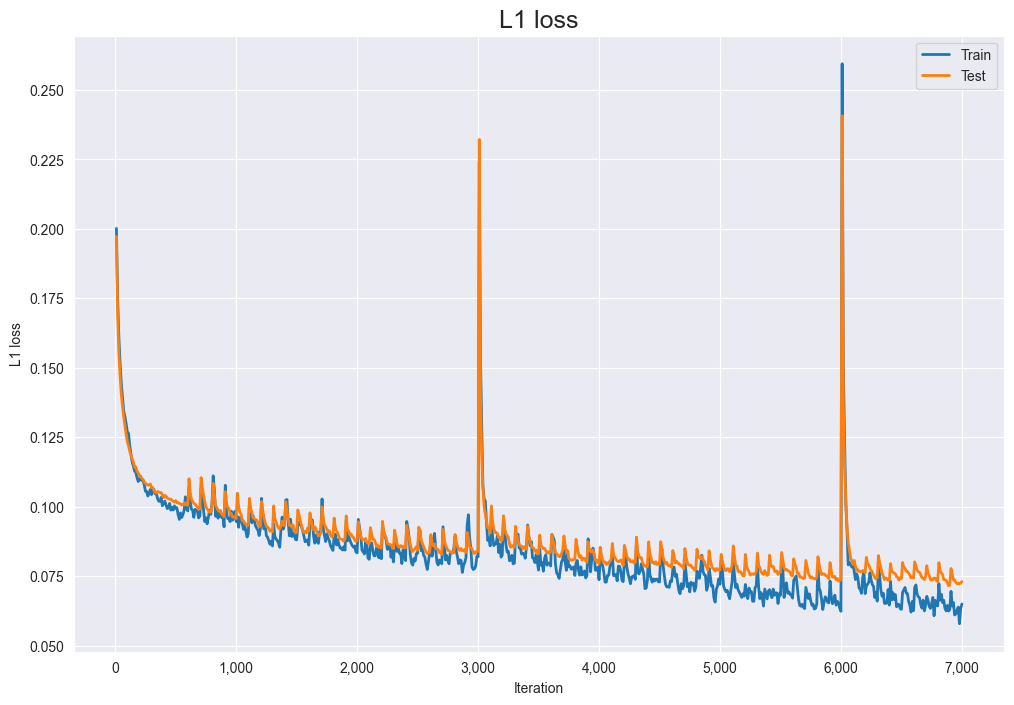

In [12]:
# plot L1 loss curves
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.title('L1 loss', fontsize=18)
plt.plot(df_eval_metrics['train/loss_viewpoint - l1_loss'], label='Train', lw=2)
plt.plot(df_eval_metrics['test/loss_viewpoint - l1_loss'], label='Test', lw=2)
plt.xlabel('Iteration')
plt.ylabel('L1 loss')
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])

# export plot as png
plt.savefig(plot_folder + '/l1_loss.png')

# plot curves
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


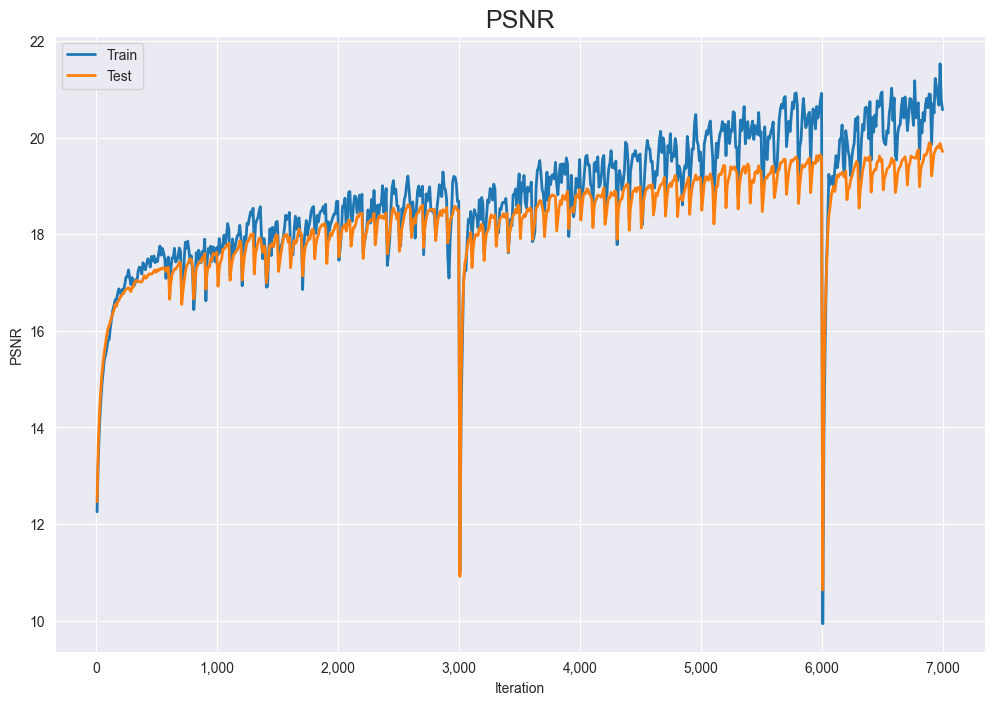

In [13]:
# plot psnr curves
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.title('PSNR', fontsize=18)
plt.plot(df_eval_metrics['train/loss_viewpoint - psnr'], label='Train', lw=2)
plt.plot(df_eval_metrics['test/loss_viewpoint - psnr'], label='Test', lw=2)
plt.xlabel('Iteration')
plt.ylabel('PSNR')
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])

# export plot as png
plt.savefig(plot_folder + '/psnr.png')

# plot curves
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


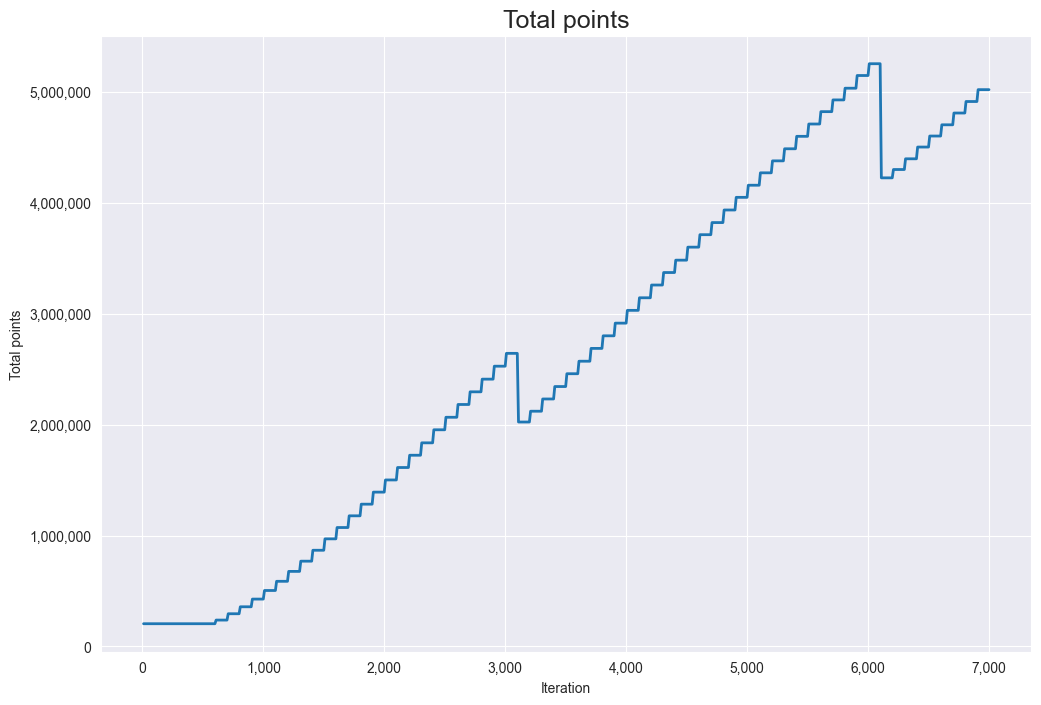

In [14]:
# plot total points
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.title('Total points', fontsize=18)
plt.plot(df_eval_metrics['total_points'], lw=2)
plt.xlabel('Iteration')
plt.ylabel('Total points')

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()
current_values_y = plt.gca().get_yticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])

# export plot as png
plt.savefig(plot_folder + '/total_points.png')

# plot curves
plt.show()

In [15]:
df_hist = reader.histograms
df_hist.head()

,step,tag,counts,limits
0,10,scene/opacity_histogram,"[0.0, 598.0, 9744.0, 32282.0, 13255.0, 27799.0...","[0.06360493692767373, 0.06996543062044111, 0.0..."
1,20,scene/opacity_histogram,"[0.0, 3.0, 93.0, 586.0, 2073.0, 6281.0, 14030....","[0.03949366159022527, 0.043443027749247805, 0...."
2,30,scene/opacity_histogram,"[0.0, 1.0, 22.0, 121.0, 258.0, 634.0, 1351.0, ...","[0.026974702267758523, 0.02967217249453438, 0...."
3,40,scene/opacity_histogram,"[0.0, 8.0, 16.0, 68.0, 137.0, 251.0, 440.0, 78...","[0.02026649306368033, 0.022293142370048362, 0...."
4,50,scene/opacity_histogram,"[0.0, 6.0, 14.0, 40.0, 67.0, 122.0, 193.0, 339...","[0.01522651620111219, 0.01674916782122341, 0.0..."


c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


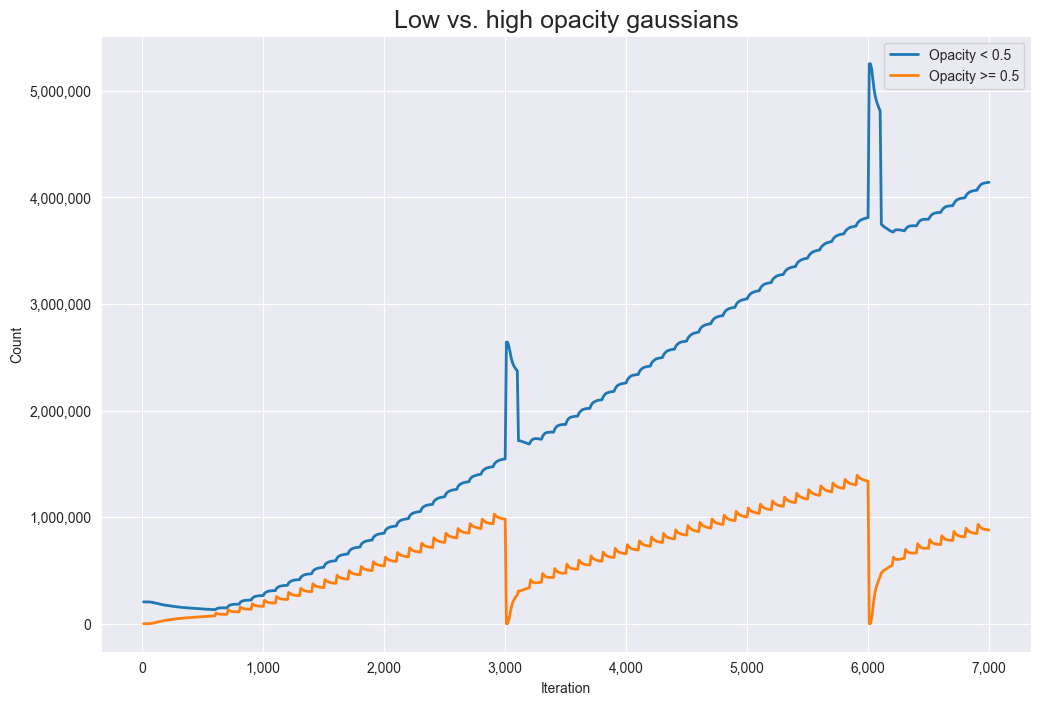

In [16]:
# Calculate total counts for limits < 0.5 and limits >= 0.5 for each step
df_hist['counts_less_than_0.5'] = df_hist.apply(lambda row: row['counts'][row['limits'] < 0.5].sum(), axis=1)
df_hist['counts_greater_than_or_equal_0.5'] = df_hist.apply(lambda row: row['counts'][row['limits'] >= 0.5].sum(), axis=1)

sns.set_style("darkgrid")

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot counts for limits < 0.5
plt.plot(df_hist['step'], df_hist['counts_less_than_0.5'], label='Opacity < 0.5', lw=2)

# Plot counts for limits >= 0.5
plt.plot(df_hist['step'], df_hist['counts_greater_than_or_equal_0.5'], label='Opacity >= 0.5', lw=2)

# Add title and labels
plt.title('Low vs. high opacity gaussians', fontsize=18)
plt.xlabel('Iteration')
plt.ylabel('Count')

# Add legend
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()
current_values_y = plt.gca().get_yticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])

# Export plot as png
plt.savefig(plot_folder + '/opacity_low_vs_high.png')

# Show the plot
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


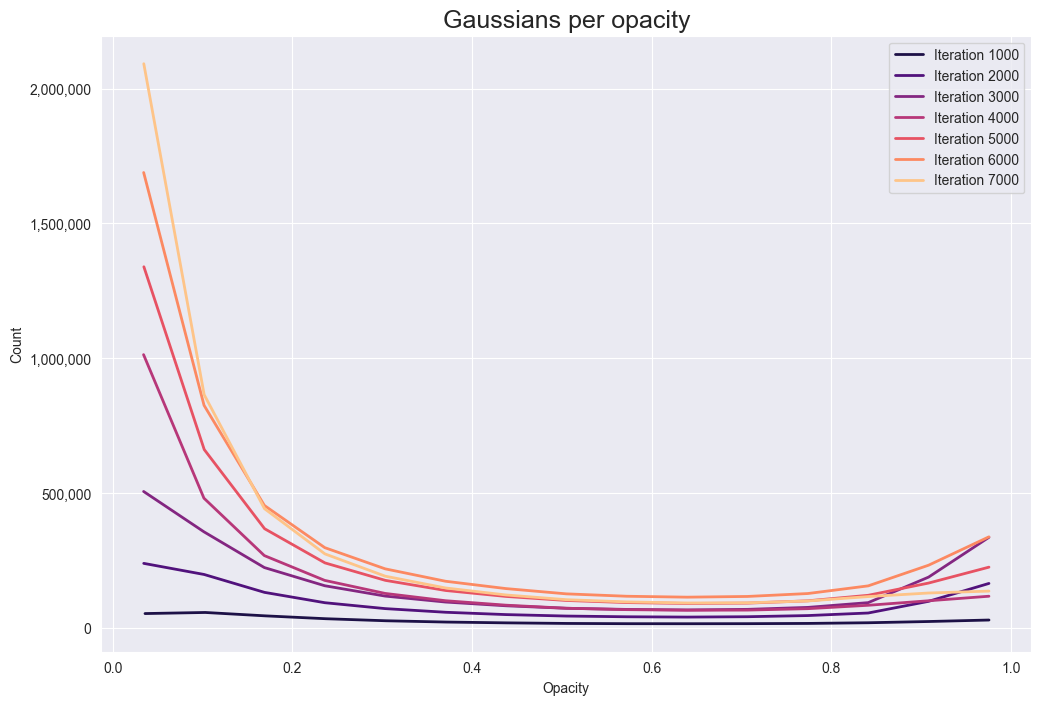

In [31]:
df_hist_reduced = df_hist[df_hist['step'] % 1000 == 0]

sns.set_style("darkgrid")
sns.set_palette("magma", 7)
plt.figure(figsize=(12, 8))

def plot_subplots(data, label):
  counts = data['counts'].iloc[0]
  limits = data['limits'].iloc[0]
  x, y = SummaryReader.histogram_to_bins(counts, limits, limits[0], limits[-1], 15)
  # Draw the densities in a few steps
  plt.plot(x, y, lw=2, label=label)

# Plot each histogram
for i, step in enumerate(df_hist_reduced['step']):
  plot_subplots(df_hist_reduced[df_hist_reduced['step'] == step], f'Iteration {step}')

plt.title('Gaussians per opacity', fontsize=18)
plt.xlabel('Opacity')
plt.ylabel('Count')
plt.legend()

# after plotting the data, format the labels
current_values_y = plt.gca().get_yticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])

# export plot as png
plt.savefig(plot_folder + '/opacity_count.png')

# plot curves
plt.show()

In [2]:
df_img = reader.images
df_img.head()

,step,tag,value
0,10,test_view_0017/render,"[[[73, 81, 82], [73, 81, 82], [73, 81, 81], [7..."
1,20,test_view_0017/render,"[[[87, 96, 98], [87, 96, 98], [87, 96, 98], [8..."
2,30,test_view_0017/render,"[[[97, 107, 110], [97, 107, 110], [97, 107, 11..."
3,40,test_view_0017/render,"[[[101, 111, 113], [101, 111, 113], [101, 111,..."
4,50,test_view_0017/render,"[[[96, 105, 107], [96, 105, 107], [96, 105, 10..."


In [4]:
render = [1, 5]
img_tags = df_img['tag'].unique()
render_tags = [img_tags[i] for i in render] # ['test_view_0161/render', 'test_view_0049/render']

In [5]:
for render_tag in render_tags:
    render_folder = log_dir + '/eval/' + render_tag
    os.makedirs(render_folder, exist_ok=True)
    counter = int(1)

    for i in df_img.index:
        if df_img.loc[i, 'tag'] != render_tag:
            continue

        image = df_img.loc[i, 'value']
        height, width, _ = image.shape
        plt.figure(figsize=(width/80, height/80), dpi=80)
        plt.imshow(image)
        plt.axis('off')
        plt.box(False)
        plt.savefig(render_folder + '/' + str(counter) + '.png', bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)

        plt.close()

        counter += 1